In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import torch
import numpy as np
import matplotlib.pyplot as plt
import os, sys, shutil, copy, time, random

import sys
sys.path.append('../../')

In [2]:
from torchuq.metric.interval import *
from torchuq.metric import distribution, quantile, interval
from torchuq.transform.naive import *
from torchuq.transform.conformal import *
from torchuq.transform.basic import *

torchuq.transform.basic


In [3]:
def slice_prediction(predictions, t, ptype):
    if ptype == 'distribution':
        sliced = Normal(loc=predictions.loc[t:t+1], scale=predictions.scale[t:t+1])
    elif ptype == 'ensemble':
        sliced = {key: slice_prediction(val, t, _parse_name(key)[0]) for key, val in predictions.items()}
    else:
        sliced = predictions[t:t+1]
    return sliced

In [4]:
n_pred = 200
def generate_predictions(n_pred):
    pred_distribution = Normal(loc=torch.linspace(0, 2, n_pred)[torch.randperm(n_pred)], scale=torch.ones(n_pred))
    labels = pred_distribution.sample() 

    pred_point = distribution_to_point(pred_distribution, functional='mean') 
    pred_interval = distribution_to_interval(pred_distribution, confidence=0.9)
    pred_quantile = distribution_to_quantile(pred_distribution, n_quantiles=10)
    pred_quantile2 = distribution_to_quantile(pred_distribution, quantiles=torch.linspace(0, 1, 12)[1:-1].pow(3))   # Get a strange quantile choice to make sure things still work
    pred_particle = distribution_to_particle(pred_distribution, n_particles=30)
    pred_ensemble = {'point_1': pred_point, 'interval_1': pred_interval, 'quantile_1': pred_quantile} 
    
    prediction_list = [pred_particle, pred_distribution, pred_point, pred_interval, pred_quantile, pred_quantile2, pred_ensemble]
    prediction_type = ['particle', 'distribution', 'point', 'interval', 'quantile', 'quantile', 'ensemble']

    return prediction_list, prediction_type, labels

prediction_list, prediction_type, labels = generate_predictions(n_pred)


def generate_degenerate_predictions(n_pred):
    predictions = torch.linspace(0, 1, n_pred)
    labels = predictions + torch.linspace(-1, 0.5, n_pred).clamp(min=0.0) + torch.linspace(-0.5, 1, n_pred).clamp(max=0.0)
    perm = torch.randperm(n_pred)
    predictions = predictions[perm]
    labels = labels[perm]
    return predictions, labels

Finished prediction particle test 0/1000, time elapsed=0.2
Finished prediction particle test 100/1000, time elapsed=24.8
Finished prediction particle test 200/1000, time elapsed=48.5
Finished prediction particle test 300/1000, time elapsed=71.7
Finished prediction particle test 400/1000, time elapsed=95.0
Finished prediction particle test 500/1000, time elapsed=118.4
Finished prediction particle test 600/1000, time elapsed=141.9
Finished prediction particle test 700/1000, time elapsed=165.3
Finished prediction particle test 800/1000, time elapsed=188.7
Finished prediction particle test 900/1000, time elapsed=212.1
Finished prediction particle test 0/1000, time elapsed=235.7
Finished prediction particle test 100/1000, time elapsed=259.1
Finished prediction particle test 200/1000, time elapsed=282.5
Finished prediction particle test 300/1000, time elapsed=305.9
Finished prediction particle test 400/1000, time elapsed=329.2
Finished prediction particle test 500/1000, time elapsed=352.5
Fi

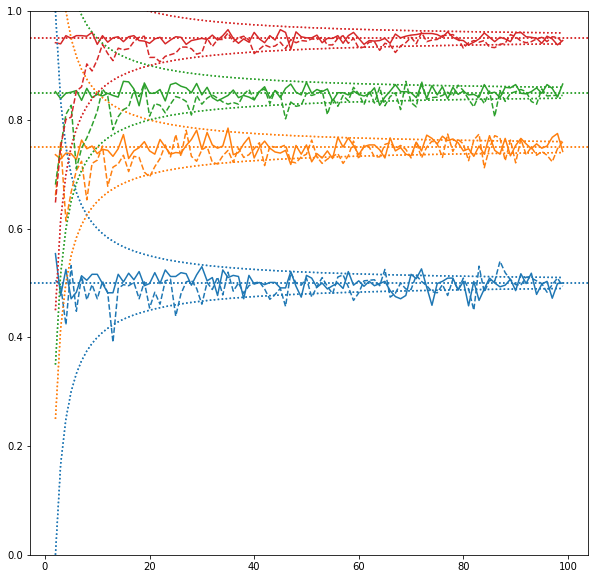

Finished prediction distribution test 0/1000, time elapsed=0.8
Finished prediction distribution test 100/1000, time elapsed=78.9
Finished prediction distribution test 200/1000, time elapsed=156.0
Finished prediction distribution test 300/1000, time elapsed=232.8
Finished prediction distribution test 400/1000, time elapsed=309.3
Finished prediction distribution test 500/1000, time elapsed=386.1
Finished prediction distribution test 600/1000, time elapsed=462.9
Finished prediction distribution test 700/1000, time elapsed=539.3
Finished prediction distribution test 800/1000, time elapsed=615.6
Finished prediction distribution test 900/1000, time elapsed=692.2
Finished prediction distribution test 0/1000, time elapsed=768.8
Finished prediction distribution test 100/1000, time elapsed=845.4
Finished prediction distribution test 200/1000, time elapsed=922.2
Finished prediction distribution test 300/1000, time elapsed=998.9
Finished prediction distribution test 400/1000, time elapsed=1075.5
F

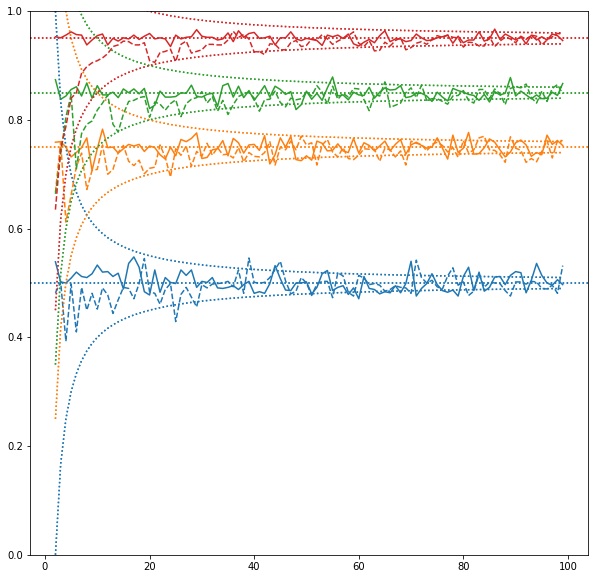

Finished prediction point test 0/1000, time elapsed=0.1
Finished prediction point test 100/1000, time elapsed=13.9
Finished prediction point test 200/1000, time elapsed=27.7
Finished prediction point test 300/1000, time elapsed=41.5
Finished prediction point test 400/1000, time elapsed=55.3
Finished prediction point test 500/1000, time elapsed=69.2
Finished prediction point test 600/1000, time elapsed=83.0
Finished prediction point test 700/1000, time elapsed=96.8
Finished prediction point test 800/1000, time elapsed=110.6
Finished prediction point test 900/1000, time elapsed=124.5
Finished prediction point test 0/1000, time elapsed=138.3
Finished prediction point test 100/1000, time elapsed=152.1
Finished prediction point test 200/1000, time elapsed=165.9
Finished prediction point test 300/1000, time elapsed=179.7
Finished prediction point test 400/1000, time elapsed=193.5
Finished prediction point test 500/1000, time elapsed=207.3
Finished prediction point test 600/1000, time elapsed

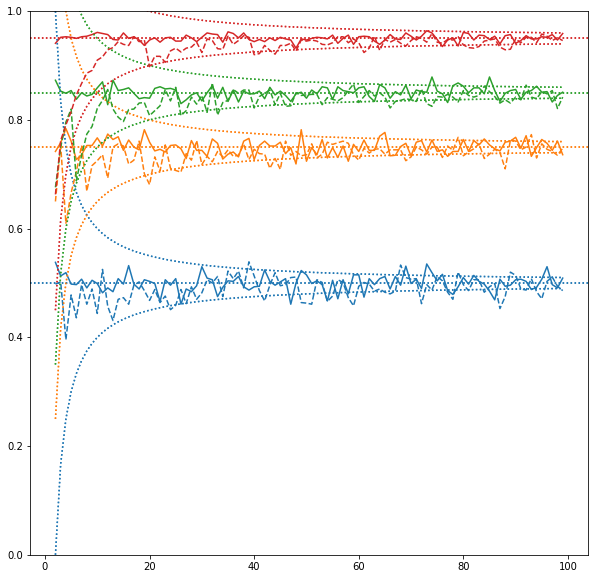

Finished prediction interval test 0/1000, time elapsed=0.2
Finished prediction interval test 100/1000, time elapsed=16.8
Finished prediction interval test 200/1000, time elapsed=33.4
Finished prediction interval test 300/1000, time elapsed=50.1
Finished prediction interval test 400/1000, time elapsed=66.7
Finished prediction interval test 500/1000, time elapsed=83.4
Finished prediction interval test 600/1000, time elapsed=100.0
Finished prediction interval test 700/1000, time elapsed=116.7
Finished prediction interval test 800/1000, time elapsed=133.4
Finished prediction interval test 900/1000, time elapsed=150.1
Finished prediction interval test 0/1000, time elapsed=166.8
Finished prediction interval test 100/1000, time elapsed=183.4
Finished prediction interval test 200/1000, time elapsed=200.1
Finished prediction interval test 300/1000, time elapsed=216.7
Finished prediction interval test 400/1000, time elapsed=233.3
Finished prediction interval test 500/1000, time elapsed=250.0
Fin

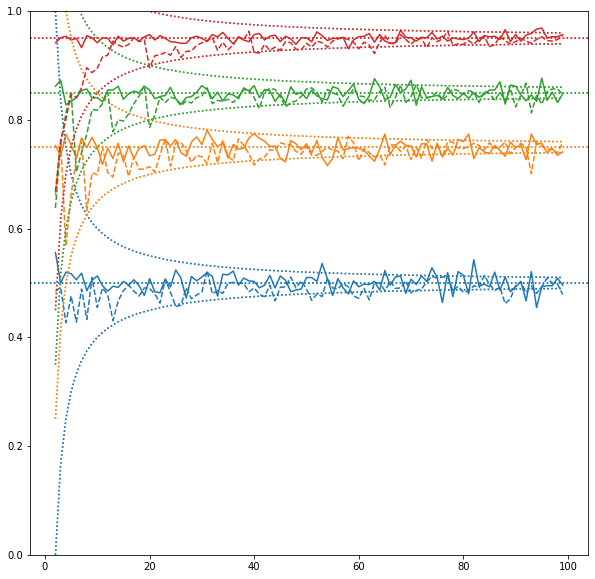

Finished prediction quantile test 0/1000, time elapsed=0.2
Finished prediction quantile test 100/1000, time elapsed=24.0
Finished prediction quantile test 200/1000, time elapsed=47.7
Finished prediction quantile test 300/1000, time elapsed=71.4
Finished prediction quantile test 400/1000, time elapsed=95.2
Finished prediction quantile test 500/1000, time elapsed=118.9
Finished prediction quantile test 600/1000, time elapsed=142.7
Finished prediction quantile test 700/1000, time elapsed=166.4
Finished prediction quantile test 800/1000, time elapsed=190.2
Finished prediction quantile test 900/1000, time elapsed=214.0
Finished prediction quantile test 0/1000, time elapsed=237.8
Finished prediction quantile test 100/1000, time elapsed=261.5
Finished prediction quantile test 200/1000, time elapsed=285.2
Finished prediction quantile test 300/1000, time elapsed=308.9
Finished prediction quantile test 400/1000, time elapsed=332.6
Finished prediction quantile test 500/1000, time elapsed=356.4
Fi

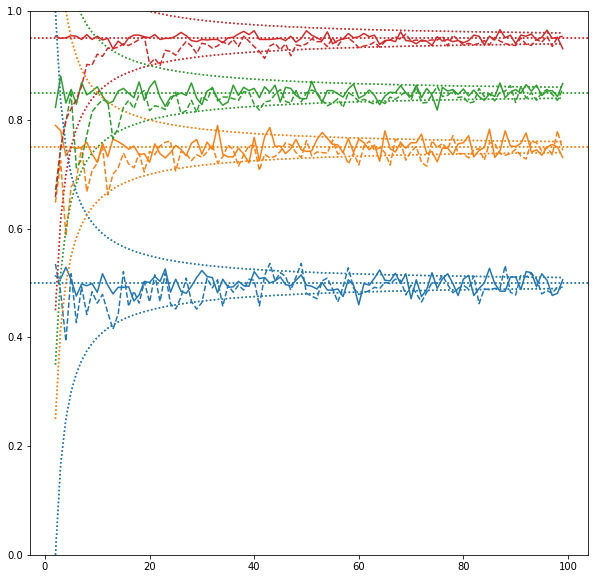

Finished prediction quantile test 0/1000, time elapsed=0.2
Finished prediction quantile test 100/1000, time elapsed=23.7
Finished prediction quantile test 200/1000, time elapsed=47.1
Finished prediction quantile test 300/1000, time elapsed=70.6
Finished prediction quantile test 400/1000, time elapsed=94.1
Finished prediction quantile test 500/1000, time elapsed=117.5
Finished prediction quantile test 600/1000, time elapsed=141.0
Finished prediction quantile test 700/1000, time elapsed=164.5
Finished prediction quantile test 800/1000, time elapsed=187.9
Finished prediction quantile test 900/1000, time elapsed=211.4
Finished prediction quantile test 0/1000, time elapsed=235.0
Finished prediction quantile test 100/1000, time elapsed=258.4
Finished prediction quantile test 200/1000, time elapsed=281.8
Finished prediction quantile test 300/1000, time elapsed=305.3
Finished prediction quantile test 400/1000, time elapsed=328.7
Finished prediction quantile test 500/1000, time elapsed=352.2
Fi

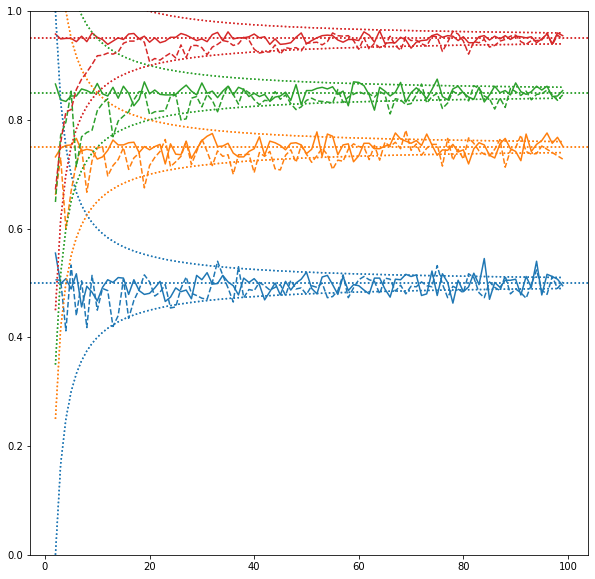

NameError: name '_parse_name' is not defined

<Figure size 720x720 with 0 Axes>

In [5]:
# Check the correctness of empirical coverage 
total_test = 1000
confidences = [0.5, 0.75, 0.85, 0.95]

for pi, ptype in enumerate(prediction_type):
    plt.figure(figsize=(10, 10))
    start_time = time.time()
    
    for cti, coverage_type in enumerate(['exact', '1/N']):
        for ci, confidence in enumerate(confidences):

            coverage_list = []
            for repeat in range(total_test):
                calibrator = ConformalIntervalPredictor(input_type=ptype, coverage=coverage_type, confidence=confidence)
                prediction_list, prediction_type, labels = generate_predictions(n_pred)
                prediction = prediction_list[pi]

                history = []
                max_t = 100
                for t in range(max_t): 
                    sliced = slice_prediction(prediction, t, ptype)
                    if t > 1:
                        pred_calibrated = calibrator(sliced)   
                        history.append(pred_calibrated)
                    calibrator.update(sliced, labels[t:t+1])
                history = torch.cat(history, axis=0)

                coverage = ((labels[2:max_t] >= history[:, 0]) & (labels[2:max_t] <= history[:, 1])).type(torch.float32)
                coverage_list.append(coverage)

                if repeat % 100 == 0:
                    print("Finished prediction %s test %d/%d, time elapsed=%.1f" % (ptype, repeat, total_test, time.time() - start_time))
            # break
            coverage_list = torch.stack(coverage_list, axis=0).mean(dim=0).cpu()
            sample_index = np.array(range(2, max_t))

            plt.plot(sample_index, coverage_list, c='C%d' % ci, linestyle=['-', '--'][cti])
            plt.axhline(confidence, c='C%d' % ci, linestyle=':')

            plt.plot(sample_index, confidence - 1 / sample_index, c='C%d' % ci, linestyle=':')
            plt.plot(sample_index, confidence + 1 / sample_index, c='C%d' % ci, linestyle=':')
    plt.ylim([0, 1])
    plt.show()


In [ ]:
# Test the case with degenerate predictions so the non-conformity scores are identical. 

total_test = 1000
confidences = [0.4, 0.6, 0.8, 0.9]


plt.figure(figsize=(10, 10))
start_time = time.time()

for coverage_type in ['exact', '1/N']:
    for ci, confidence in enumerate(confidences):

        coverage_list = []
        for repeat in range(total_test):
            calibrator = ConformalIntervalPredictor(input_type='point', coverage=coverage_type, confidence=confidence)
            prediction, labels = generate_degenerate_predictions(n_pred)

            history = []
            max_t = 100
            for t in range(max_t): 
                sliced = slice_prediction(prediction, t, ptype)
                if t > 1:
                    pred_calibrated = calibrator(sliced)   
                    history.append(pred_calibrated)
                calibrator.update(sliced, labels[t:t+1])
            history = torch.cat(history, axis=0)

            coverage = ((labels[2:max_t] >= history[:, 0]) & (labels[2:max_t] <= history[:, 1])).type(torch.float32)
            coverage_list.append(coverage)

            if repeat % 100 == 0:
                print("Finished prediction %s test %d/%d, time elapsed=%.1f" % (ptype, repeat, total_test, time.time() - start_time))
        # break
        coverage_list = torch.stack(coverage_list, axis=0).mean(dim=0).cpu()
        sample_index = np.array(range(2, max_t))

        plt.plot(sample_index, coverage_list, c='C%d' % ci)
        plt.axhline(confidence, c='C%d' % ci, linestyle=':')

        plt.plot(sample_index, confidence - 1 / sample_index, c='C%d' % ci, linestyle=':')
        plt.plot(sample_index, confidence + 1 / sample_index, c='C%d' % ci, linestyle=':')
        plt.ylim([0, 1])
        plt.show()
